In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import ast

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills_list: ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)

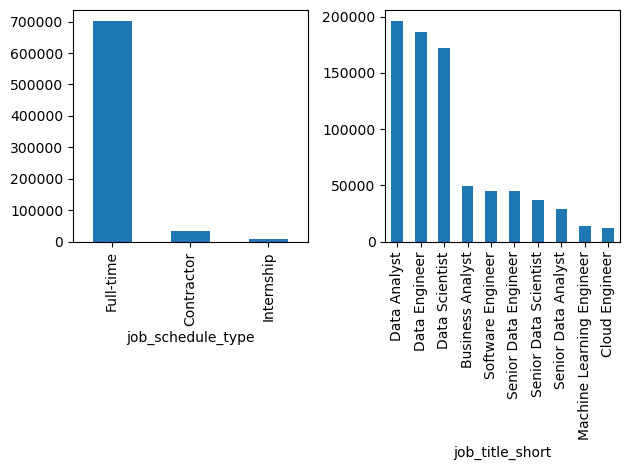

In [2]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

In [3]:
df_skills = df.copy()
df_exploded = df_skills.explode('job_skills')
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()
skills_count_df = skills_count.reset_index(name= 'skill_count')
skills_count_df = skills_count_df.sort_values(by='skill_count', ascending=False)
skills_count_df

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


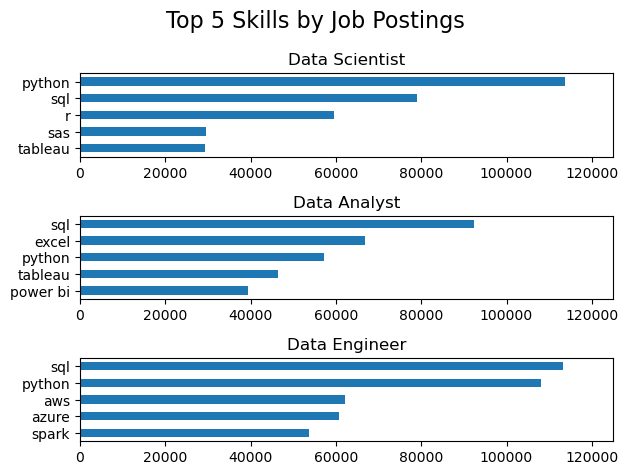

In [23]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = skills_count_df[skills_count_df['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 125000)
    
fig.suptitle('Top 5 Skills by Job Postings', fontsize=16)
fig.tight_layout()